In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15
# mpl.rcParams['axes.linewidth'] = 2

In [2]:
THz_TO_CMM = 33.35641

def process_PHonon_fildyn(fname):
    freqs = {"imode":[],"THz":[],"CMM":[]}
    imode = 1
    with open(fname) as f:
        line = f.readline()
        while line != '':
            if 'freq' in line:
                freqs["imode"].append(imode)
                freqs["THz"].append(float(line[19:35]))
                freqs["CMM"].append(float(line[19:35])*THz_TO_CMM)
                imode += 1
            line = f.readline()
    return freqs

In [3]:
!ls

100Ry  80Ry			       Diamond_phonon_dispersion_60Ry.png
120Ry  C.pz-mt.fhi.UPF		       Phonon_dispersion.ipynb
60Ry   Diamond_phonon_differences.png  Phonon_frequency_differences.ipynb


In [4]:
cutoffs = [60,80,100,120]
pdeps = [200,200,400,600]
myph = pd.DataFrame({})
qeph = pd.DataFrame({})

for cutoff, pdep in zip(cutoffs,pdeps):
    for iq in range(1,4):
        if iq == 1:
            fname = "./%dRy/c.asr.dyn1"%cutoff
        else:
            fname = "./%dRy/_ph0/c.dyn%d"%(cutoff,iq)
        arr = process_PHonon_fildyn(fname)
        df = pd.DataFrame(arr)
        df["cutoff"] = cutoff
        df["iq"] = iq
        if qeph.shape[0] == 0:
            qeph = df
        else:
            qeph = pd.concat([qeph,df])
            
        fname = "./%dRy/c.welph.save.pdep%d/dyn%d"%(cutoff,pdep,iq)
        arr = process_PHonon_fildyn(fname)
        df = pd.DataFrame(arr)
        df["cutoff"] = cutoff
        df["iq"] = iq
        if myph.shape[0] == 0:
            myph = df
        else:
            myph = pd.concat([myph,df])

In [14]:
mean_abs_error = []
max_abs_error = []

qe_mean_abs_error_to_convger = []
qe_max_abs_error_to_convger = []

my_mean_abs_error_to_convger = []
my_max_abs_error_to_convger = []

for cutoff in cutoffs:
    df1 = qeph[qeph["cutoff"]==cutoff]
    df2 = myph[myph["cutoff"]==cutoff]
    
    mean_abs_error.append(np.mean(np.abs(df1["CMM"]-df2["CMM"])))
    max_abs_error.append(np.max(np.abs(df1["CMM"]-df2["CMM"])))
    
    fully1 = qeph[qeph["cutoff"]==cutoffs[-1]]
    qe_mean_abs_error_to_convger.append(np.mean(np.abs(df1["CMM"]-fully1["CMM"])))
    qe_max_abs_error_to_convger.append(np.max(np.abs(df1["CMM"]-fully1["CMM"])))
    
    fully2 = myph[myph["cutoff"]==cutoffs[-1]]
    my_mean_abs_error_to_convger.append(np.mean(np.abs(df2["CMM"]-fully2["CMM"])))
    my_max_abs_error_to_convger.append(np.max(np.abs(df2["CMM"]-fully2["CMM"])))

In [6]:
print(cutoffs)
print(mean_abs_error)
print(max_abs_error)

[60, 80, 100, 120]
[0.7067630276155307, 0.09152628277223109, 0.015451430365598283, 0.002900154536086359]
[3.8939272341700644, 0.39123733289000029, 0.065678771289981341, 0.015277235779990406]


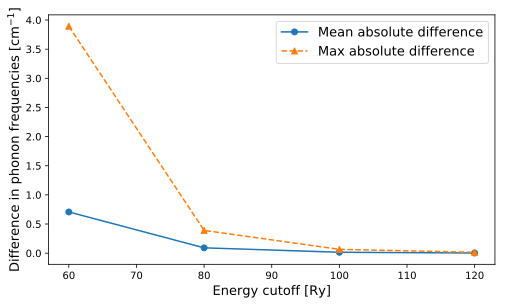

In [16]:
fig = plt.figure(figsize=(8,4.5))
plt.style.use('default')
plt.plot(cutoffs,mean_abs_error,'o-',label="Mean absolute difference")
plt.plot(cutoffs,max_abs_error,'^--',label="Max absolute difference")
# plt.plot(cutoffs,qe_mean_abs_error_to_convger,'o-',label="QE Mean absolute difference")
# plt.plot(cutoffs,qe_max_abs_error_to_convger,'o-',label="QE Max absolute difference")
# plt.plot(cutoffs,my_mean_abs_error_to_convger,'o-',label="My Mean absolute difference")
# plt.plot(cutoffs,my_max_abs_error_to_convger,'o-',label="My Max absolute difference")




plt.legend(fontsize=13)
plt.xlabel("Energy cutoff [Ry]",fontsize=13)
plt.ylabel(r"Difference in phonon frequencies [$\mathrm{cm}^{-1}$]",fontsize=13)
plt.show()
fig.savefig("Diamond_phonon_differences.png",dpi=200,bbox_inches="tight")